In [1]:
import pandas as pd
import numpy as np
def printl():
    print("===================================================")
    
def printt(a):
    print(a)
    print("===================================================")
    

In [2]:
s = pd.Series([11,23,3,4,5,6])
print(s)
dates = pd.date_range('20160101',periods = 9)
print(dates)

0    11
1    23
2     3
3     4
4     5
5     6
dtype: int64
DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09'],
              dtype='datetime64[ns]', freq='D')


# 生成DataFrame

In [3]:
df = pd.DataFrame(np.array([[1,2,3],[3,4,5]]),index = ['x','y'], columns = ['a','b','c']) # columns = list('abc')
print(df)
df1 = pd.DataFrame(np.random.random((9,4)))
print(df1)
# 用字典生成
df3 = pd.DataFrame({"A":[1,2,3,4],"B":3.0,"C":"love"})
print(df3)
printl()
# dtypes 是每一列的数据类型
print(df3.dtypes)
printl()
print(df3.index)
printl()
print(df3.columns)
printl()
print(df3.values)
printl()
# 都是按列统计的
print(df.describe())
printl()
print(df3.T)
printl()
 

   a  b  c
x  1  2  3
y  3  4  5
          0         1         2         3
0  0.876634  0.359655  0.467278  0.254572
1  0.721742  0.210876  0.989938  0.236244
2  0.374193  0.829816  0.684897  0.912094
3  0.881037  0.805223  0.349785  0.192387
4  0.938873  0.703592  0.022876  0.727381
5  0.827335  0.454027  0.201080  0.920489
6  0.413326  0.548428  0.860483  0.550385
7  0.418190  0.647378  0.246595  0.379039
8  0.291181  0.522191  0.511489  0.668083
   A    B     C
0  1  3.0  love
1  2  3.0  love
2  3  3.0  love
3  4  3.0  love
A      int64
B    float64
C     object
dtype: object
RangeIndex(start=0, stop=4, step=1)
Index(['A', 'B', 'C'], dtype='object')
[[1 3.0 'love']
 [2 3.0 'love']
 [3 3.0 'love']
 [4 3.0 'love']]
              a         b         c
count  2.000000  2.000000  2.000000
mean   2.000000  3.000000  4.000000
std    1.414214  1.414214  1.414214
min    1.000000  2.000000  3.000000
25%    1.500000  2.500000  3.500000
50%    2.000000  3.000000  4.000000
75%    2.500000  3.500

# 整理排序

In [4]:
df = pd.DataFrame({"A":[1,2,3,4],"B":3.0,"C":"love"})
print(df)
printl()
print(df.sort_index(axis = 1,ascending = False))
printl()
print(df.sort_index(axis = 0,ascending = False))


   A    B     C
0  1  3.0  love
1  2  3.0  love
2  3  3.0  love
3  4  3.0  love
      C    B  A
0  love  3.0  1
1  love  3.0  2
2  love  3.0  3
3  love  3.0  4
   A    B     C
3  4  3.0  love
2  3  3.0  love
1  2  3.0  love
0  1  3.0  love


In [5]:
df = pd.DataFrame({"A":[5,2,3,4],"B":3.0,"C":"love"})
print(df)
printl()
print(df.sort_values(by = "A",ascending = False))

   A    B     C
0  5  3.0  love
1  2  3.0  love
2  3  3.0  love
3  4  3.0  love
   A    B     C
0  5  3.0  love
3  4  3.0  love
2  3  3.0  love
1  2  3.0  love


# 选择数据

In [6]:
dates = pd.date_range('20190101',periods = 4)
df = pd.DataFrame(np.arange(12).reshape((4,3)),index = dates,columns = ['A','B','C'])
print(df)
printl()
# 后面直接跟[]只能取列
print(df.A)
print(df['A'])
printl()
# 切片取行
print(df[0:3])
printl()
# 只能切片，不能单行
print(df['20190101':'20190102'])
printl()
# 单行也要用切片的方式
print(df['20190101':'20190101'])

            A   B   C
2019-01-01  0   1   2
2019-01-02  3   4   5
2019-01-03  6   7   8
2019-01-04  9  10  11
2019-01-01    0
2019-01-02    3
2019-01-03    6
2019-01-04    9
Freq: D, Name: A, dtype: int64
2019-01-01    0
2019-01-02    3
2019-01-03    6
2019-01-04    9
Freq: D, Name: A, dtype: int64
            A  B  C
2019-01-01  0  1  2
2019-01-02  3  4  5
2019-01-03  6  7  8
            A  B  C
2019-01-01  0  1  2
2019-01-02  3  4  5
            A  B  C
2019-01-01  0  1  2


## 纯标签挑选 loc[ ]

In [7]:
dates = pd.date_range('20190101',periods = 4)
df = pd.DataFrame(np.arange(12).reshape((4,3)),index = dates,columns = ['A','B','C'])
print(df)
printl()
print(df.loc['20190103']['B'])
printl()
# loc只能取行
print(df.loc['20190101'])
printl()
# 想要列的话，用切片方法
# 这里相当于，先用loc取行，再在取到的切片中用 .A 或 [‘A’]
print(df.loc[:]["A"])
printl()
print(df.loc[:].A)
printl()
print(df.loc[:][:])
printl()
print(df.loc['20190101':'20190103'])
# 行列全部取任意的
printl()
print(df.loc['20190101':'20190103',["A",'B']])
printl()
print(df.loc['20190101':'20190103',"A":'A'])
printl()
print(df.loc['20190101':'20190103',["A",'C']])

            A   B   C
2019-01-01  0   1   2
2019-01-02  3   4   5
2019-01-03  6   7   8
2019-01-04  9  10  11
7
A    0
B    1
C    2
Name: 2019-01-01 00:00:00, dtype: int64
2019-01-01    0
2019-01-02    3
2019-01-03    6
2019-01-04    9
Freq: D, Name: A, dtype: int64
2019-01-01    0
2019-01-02    3
2019-01-03    6
2019-01-04    9
Freq: D, Name: A, dtype: int64
            A   B   C
2019-01-01  0   1   2
2019-01-02  3   4   5
2019-01-03  6   7   8
2019-01-04  9  10  11
            A  B  C
2019-01-01  0  1  2
2019-01-02  3  4  5
2019-01-03  6  7  8
            A  B
2019-01-01  0  1
2019-01-02  3  4
2019-01-03  6  7
            A
2019-01-01  0
2019-01-02  3
2019-01-03  6
            A  C
2019-01-01  0  2
2019-01-02  3  5
2019-01-03  6  8


## 纯数字挑选 iloc[ ]


In [8]:
dates = pd.date_range('20190101',periods = 4)
df = pd.DataFrame(np.arange(12).reshape((4,3)),index = dates,columns = ['A','B','C'])
print(df)
printl()
print(df.iloc[2,1])
printl()
# 所有切片的尾巴是取不到的
print(df.iloc[0:2,1:3])
printl()
print(df.iloc[[0,2],1:3])

            A   B   C
2019-01-01  0   1   2
2019-01-02  3   4   5
2019-01-03  6   7   8
2019-01-04  9  10  11
7
            B  C
2019-01-01  1  2
2019-01-02  4  5
            B  C
2019-01-01  1  2
2019-01-03  7  8


## boolean index

In [9]:
dates = pd.date_range('20190101',periods = 4)
df = pd.DataFrame(np.arange(12).reshape((4,3)),index = dates,columns = ['A','B','C'])
print(df)
printl()
print(df[df.A>5])
print(df[df.A>5])

            A   B   C
2019-01-01  0   1   2
2019-01-02  3   4   5
2019-01-03  6   7   8
2019-01-04  9  10  11
            A   B   C
2019-01-03  6   7   8
2019-01-04  9  10  11
            A   B   C
2019-01-03  6   7   8
2019-01-04  9  10  11


# 设置值

In [10]:
dates = pd.date_range('20190101',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])
print(df)
printl()
df.iloc[2,3] = 111
print(df)
printl()
df.loc['20190101','B'] = 111
print(df)
printl()
df.A[df.A>0] = 0
print(df)
printl()

             A   B   C   D
2019-01-01   0   1   2   3
2019-01-02   4   5   6   7
2019-01-03   8   9  10  11
2019-01-04  12  13  14  15
2019-01-05  16  17  18  19
2019-01-06  20  21  22  23
             A   B   C    D
2019-01-01   0   1   2    3
2019-01-02   4   5   6    7
2019-01-03   8   9  10  111
2019-01-04  12  13  14   15
2019-01-05  16  17  18   19
2019-01-06  20  21  22   23
             A    B   C    D
2019-01-01   0  111   2    3
2019-01-02   4    5   6    7
2019-01-03   8    9  10  111
2019-01-04  12   13  14   15
2019-01-05  16   17  18   19
2019-01-06  20   21  22   23
            A    B   C    D
2019-01-01  0  111   2    3
2019-01-02  0    5   6    7
2019-01-03  0    9  10  111
2019-01-04  0   13  14   15
2019-01-05  0   17  18   19
2019-01-06  0   21  22   23


## 加一列

In [24]:
dates = pd.date_range('20190101',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])
printt(df)
# 加一列空白
df['F'] = np.nan
printt(df)
# Series 加一列，就指定index
df['G'] = pd.Series([1,2,3,4,5,6],index = pd.date_range('20190101',periods = 6))
printt(df)



             A   B   C   D
2019-01-01   0   1   2   3
2019-01-02   4   5   6   7
2019-01-03   8   9  10  11
2019-01-04  12  13  14  15
2019-01-05  16  17  18  19
2019-01-06  20  21  22  23
             A   B   C   D   F
2019-01-01   0   1   2   3 NaN
2019-01-02   4   5   6   7 NaN
2019-01-03   8   9  10  11 NaN
2019-01-04  12  13  14  15 NaN
2019-01-05  16  17  18  19 NaN
2019-01-06  20  21  22  23 NaN
             A   B   C   D   F  G
2019-01-01   0   1   2   3 NaN  1
2019-01-02   4   5   6   7 NaN  2
2019-01-03   8   9  10  11 NaN  3
2019-01-04  12  13  14  15 NaN  4
2019-01-05  16  17  18  19 NaN  5
2019-01-06  20  21  22  23 NaN  6


## 加一行

In [29]:
dates = pd.date_range('20190101',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])
printt(df)
df.loc['20190107'] = np.nan
printt(df)
# 新建一个DataFrame叠加上去
df2 = pd.DataFrame([6,6,6,6]).T
df2.columns = df.columns
new_df = pd.concat((df,df2),ignore_index = True)
printt(new_df)

             A   B   C   D
2019-01-01   0   1   2   3
2019-01-02   4   5   6   7
2019-01-03   8   9  10  11
2019-01-04  12  13  14  15
2019-01-05  16  17  18  19
2019-01-06  20  21  22  23
                        A     B     C     D
2019-01-01 00:00:00   0.0   1.0   2.0   3.0
2019-01-02 00:00:00   4.0   5.0   6.0   7.0
2019-01-03 00:00:00   8.0   9.0  10.0  11.0
2019-01-04 00:00:00  12.0  13.0  14.0  15.0
2019-01-05 00:00:00  16.0  17.0  18.0  19.0
2019-01-06 00:00:00  20.0  21.0  22.0  23.0
20190107              NaN   NaN   NaN   NaN
      A     B     C     D
0   0.0   1.0   2.0   3.0
1   4.0   5.0   6.0   7.0
2   8.0   9.0  10.0  11.0
3  12.0  13.0  14.0  15.0
4  16.0  17.0  18.0  19.0
5  20.0  21.0  22.0  23.0
6   NaN   NaN   NaN   NaN
7   6.0   6.0   6.0   6.0


# 处理数据丢失

In [12]:
dates = pd.date_range('20190101',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])
df['E'] = [1,2,3,np.nan,5,6]
df.iloc[2,1] = np.nan
printt(df)
printt(df.dropna(axis = 0, how='any')) # 又一个nan，就丢掉整个  "all" 全部是nan才丢掉整个
printt(df.dropna(axis = 1,how = 'any'))
# 填补数据
printt(df.fillna(axis = 1,value = 1000))
# isnull()判断是否丢失的函数
printt(np.all(df.isnull()))

             A     B   C   D    E
2019-01-01   0   1.0   2   3  1.0
2019-01-02   4   5.0   6   7  2.0
2019-01-03   8   NaN  10  11  3.0
2019-01-04  12  13.0  14  15  NaN
2019-01-05  16  17.0  18  19  5.0
2019-01-06  20  21.0  22  23  6.0
             A     B   C   D    E
2019-01-01   0   1.0   2   3  1.0
2019-01-02   4   5.0   6   7  2.0
2019-01-05  16  17.0  18  19  5.0
2019-01-06  20  21.0  22  23  6.0
             A   C   D
2019-01-01   0   2   3
2019-01-02   4   6   7
2019-01-03   8  10  11
2019-01-04  12  14  15
2019-01-05  16  18  19
2019-01-06  20  22  23
             A       B   C   D       E
2019-01-01   0     1.0   2   3     1.0
2019-01-02   4     5.0   6   7     2.0
2019-01-03   8  1000.0  10  11     3.0
2019-01-04  12    13.0  14  15  1000.0
2019-01-05  16    17.0  18  19     5.0
2019-01-06  20    21.0  22  23     6.0
False


# 导入导出数据
https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [13]:
# df.to_pickle("a.pickle")

# 合并DataFrame
## concat

In [14]:
df1 = pd.DataFrame(np.ones((4,5))*0,columns = ['a','b','c','d','e'])
df2 = pd.DataFrame(np.ones((4,5))*1,columns = ['a','b','c','d','e'])
df3 = pd.DataFrame(np.ones((4,5))*2,columns = ['a','b','c','d','e'])
# pd.concat()
printt(pd.concat([df1,df2,df3],axis = 0)) # axis = 0 是列叠加
printt(pd.concat([df1,df2,df3],axis = 0,ignore_index = True))


     a    b    c    d    e
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0  2.0
3  2.0  2.0  2.0  2.0  2.0
      a    b    c    d    e
0   0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0
4   1.0  1.0  1.0  1.0  1.0
5   1.0  1.0  1.0  1.0  1.0
6   1.0  1.0  1.0  1.0  1.0
7   1.0  1.0  1.0  1.0  1.0
8   2.0  2.0  2.0  2.0  2.0
9   2.0  2.0  2.0  2.0  2.0
10  2.0  2.0  2.0  2.0  2.0
11  2.0  2.0  2.0  2.0  2.0


In [15]:
df1 = pd.DataFrame(np.ones((4,5))*0,columns = ['a','b','c','d','f'],index = [0,1,2,3])
df2 = pd.DataFrame(np.ones((4,5))*1,columns = ['a','b','c','d','e'],index = [2,3,4,5])
printt(df1)
printt(df2)
# join 方式
printt(pd.concat([df1,df2],join='outer',sort=False))
printt(pd.concat([df1,df2],join='inner',sort=False))
# 
printt(df1.append([df1,df2],ignore_index = True,sort=True))
# Series 是想加行就是行，想加列就是列，完全看操作这个Series 的函数
# 自己不能通过指定是index还是columns来指定横竖，函数参数中只有 index
s1 = pd.Series([1,2,3,4,5],index = ['a','b','c','d','e'])
printt(df1.append(s1,ignore_index = True,sort=True))

     a    b    c    d    f
0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0
     a    b    c    d    e
2  1.0  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0  1.0
     a    b    c    d    f    e
0  0.0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  0.0  NaN
3  0.0  0.0  0.0  0.0  0.0  NaN
2  1.0  1.0  1.0  1.0  NaN  1.0
3  1.0  1.0  1.0  1.0  NaN  1.0
4  1.0  1.0  1.0  1.0  NaN  1.0
5  1.0  1.0  1.0  1.0  NaN  1.0
     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
      a    b    c    d    e    f
0   0.0  0.0  0.0  0.0  NaN  0.0
1   0.0  0.0  0.0  0.0  NaN  0.0
2   0.0  0.0  0.0  0.0  NaN  0.0
3   0.0  0.0  0.0  0.0  NaN  0.0
4   0.0  0.0  0.0  0.0  NaN  0.0
5   0.0  0.0  0.0  0.0  NaN  0.0
6   0.0  0.0 

## merge

In [16]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
printt(pd.merge(left,right,on = "key"))


  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [17]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
# how = ['left', 'right', 'outer', 'inner']
# 以columns来merge
printt(pd.merge(left, right, on=['key1', 'key2'], how='inner'))
printt(pd.merge(left, right, on=['key1', 'key2'], how='left'))

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2
  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


In [18]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                    index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
printt(left)
printt(right)
# 以index来merge
printt(pd.merge(left, right, left_index=True, right_index=True, how='outer'))
printt(pd.merge(left, right, left_index=True, right_index=True, how='inner'))

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3
      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3
     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [19]:
# handle overlapping
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
printt(boys)
printt(girls)
# on='k', suffixes=['_boy', '_girl']
# 列名相同时，suffixes
printt(pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner'))


    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6
    k  age_boy  age_girl
0  K0        1         4
1  K0        1         5


# plot

          A         B         C         D
0  0.022135  0.122420  1.449067 -0.505092
1 -0.389848 -1.956398  0.295649 -1.782846
2 -1.059203 -2.747175  0.108459 -0.972734
3 -2.200682 -2.340331  0.322639 -1.723291
4 -0.703912 -1.048393  1.490258 -0.290171


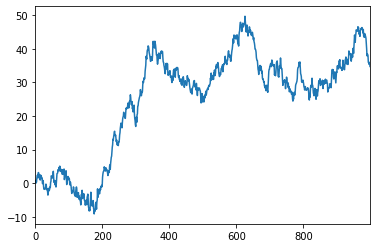

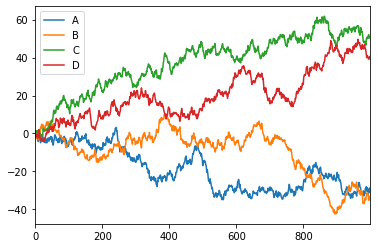

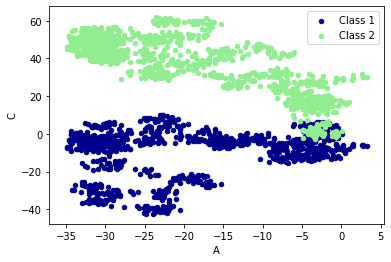

In [30]:
import matplotlib.pyplot as plt
data = pd.Series(np.random.randn(1000), index=np.arange(1000))
data = data.cumsum()
data.plot()

data = pd.DataFrame(np.random.randn(1000, 4), index=np.arange(1000), columns=list("ABCD"))
data = data.cumsum()
printt(data.head(5))
data.plot()
# plot methods:
# 'bar', 'hist', 'box', 'kde', 'area', scatter', hexbin', 'pie'
ax = data.plot.scatter(x='A', y='B', color='DarkBlue', label="Class 1")
data.plot.scatter(x='A', y='C', color='LightGreen', label='Class 2', ax=ax)

plt.show()